### <center>Dataset Attributes</center>

- **Age**: Age of the patient [years]
- **Sex**: Sex of the patient [M: Male, F: Female]
- **ChestPainType**: Type of chest pain [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: Resting blood pressure [mm Hg]
- **Cholesterol**: Serum cholesterol [mm/dl]
- **FastingBS**: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: Maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: Exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: ST depression induced by exercise relative to rest [Numeric value measured in depression]
- **ST_Slope**: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: Output class [1: heart disease, 0: Normal]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline




In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
print(df.head())
print("---------------")
print("Df shape:", df.shape)
print("---------------")
print(df.info())

# missing value
print(df.isnull().sum())



   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
---------------
Df shape: (918, 12)
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


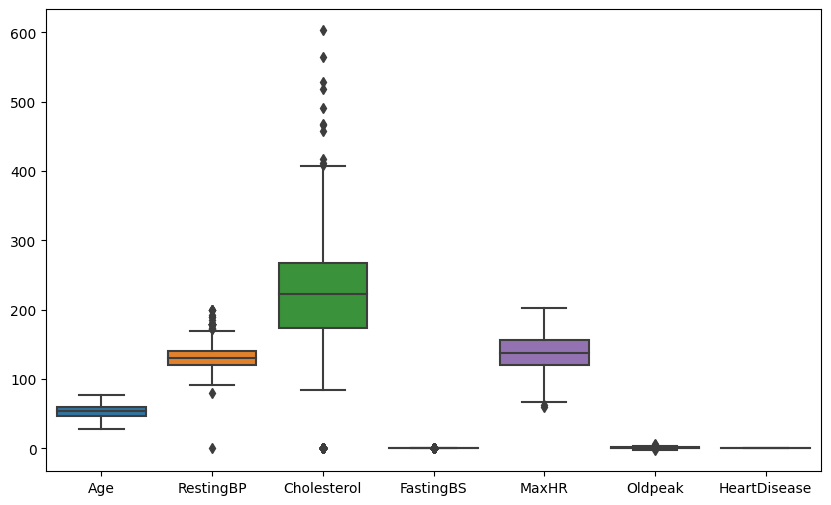

In [ ]:
# outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()



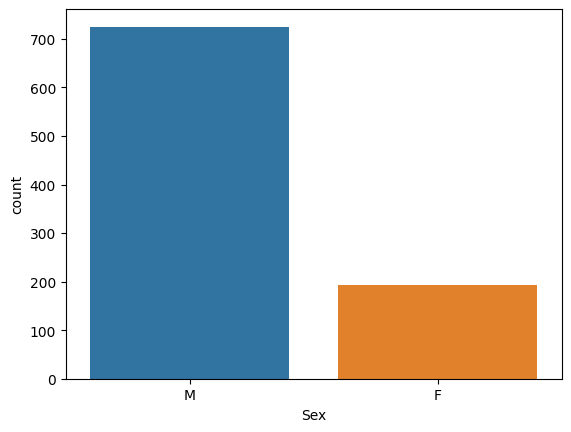

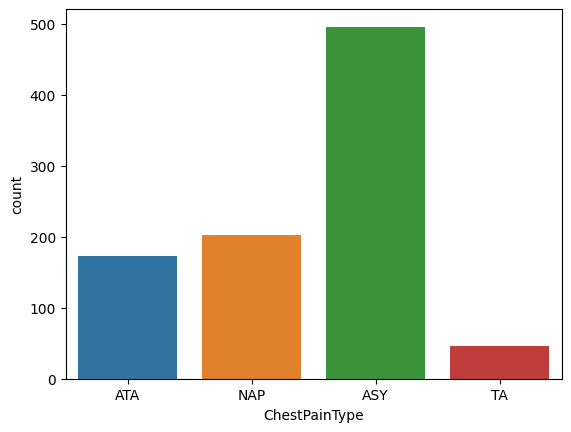

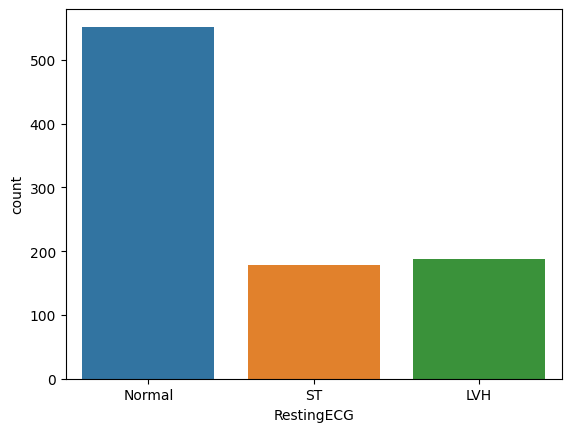

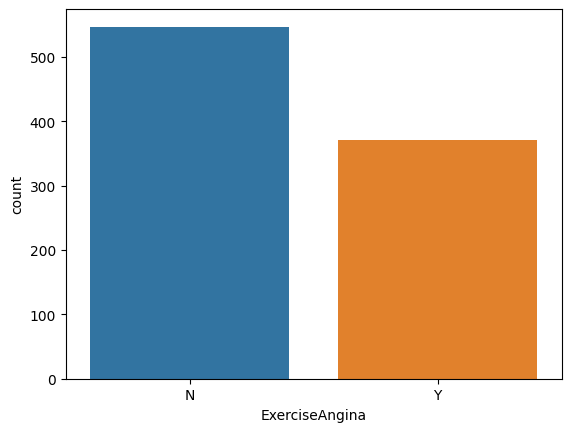

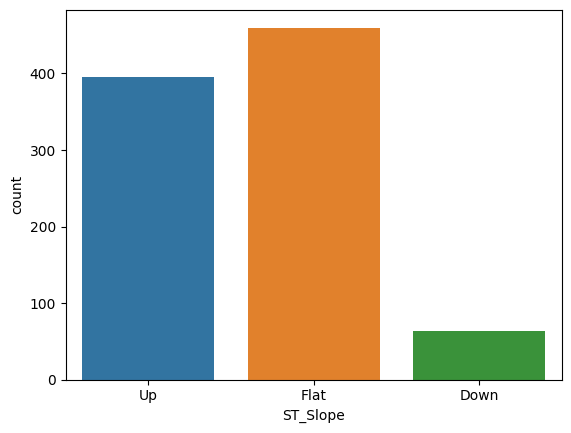

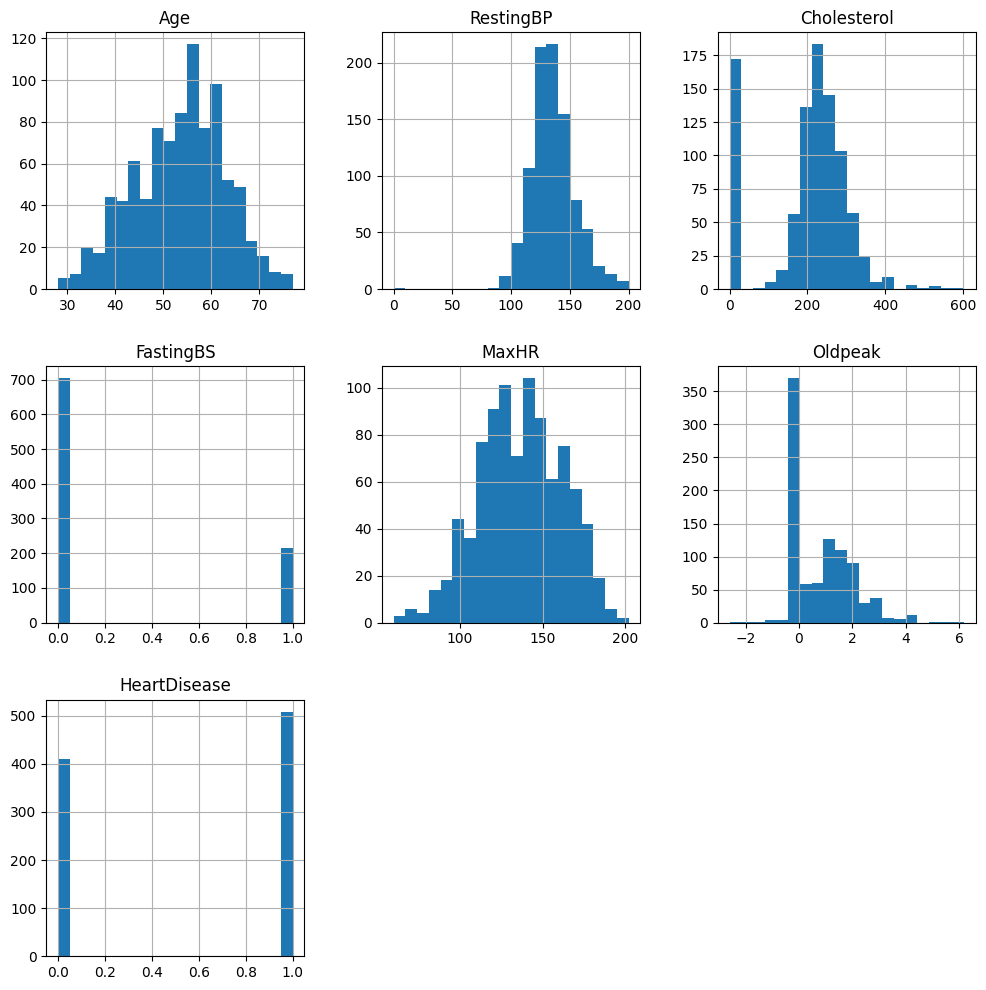

In [ ]:
# countplot for Categorical features
for column in df.select_dtypes(include='object').columns:
    sns.countplot(x=column, data=df)
    plt.show()

# countplot for Numerical features
df.hist(figsize=(12, 12), bins=20)
plt.show()

<ipython-input-13-b90c7d45fa25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


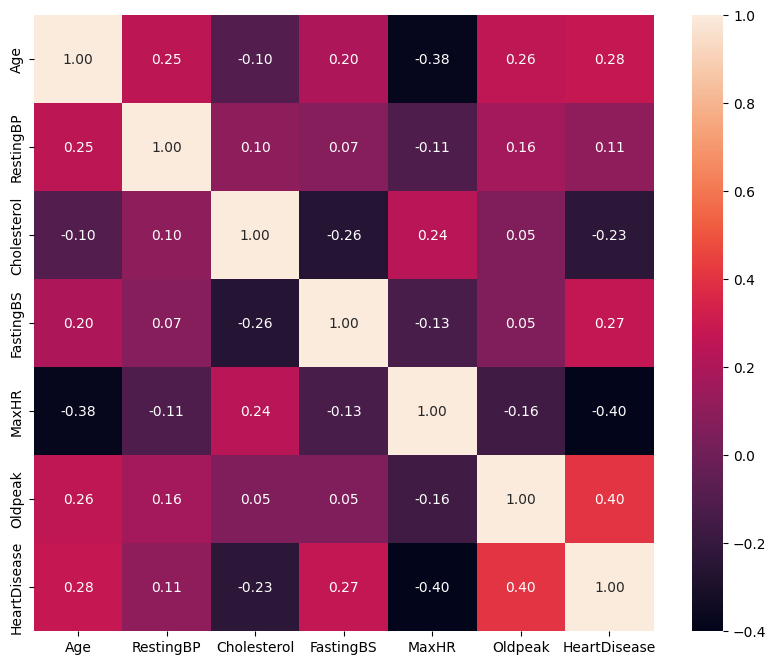

In [ ]:
# Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

<ipython-input-14-485c160b61aa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


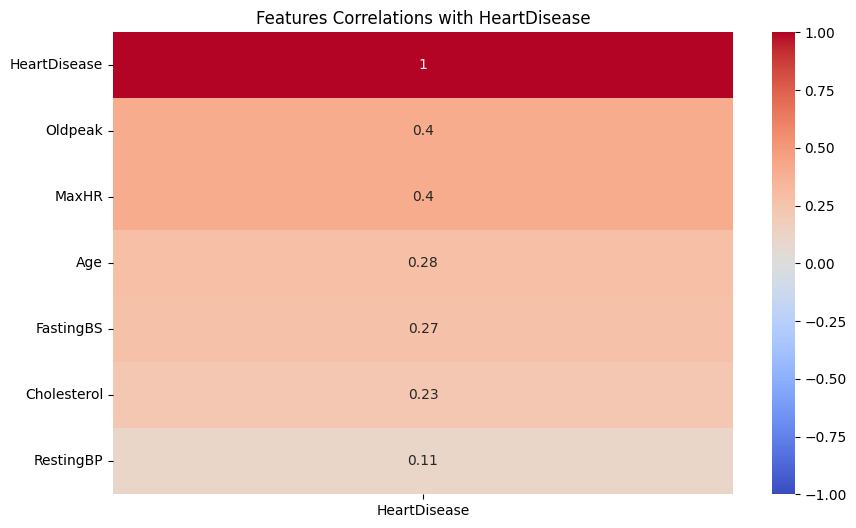

In [ ]:
# Correlation with target
target_column = 'HeartDisease'
corr_matrix = df.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

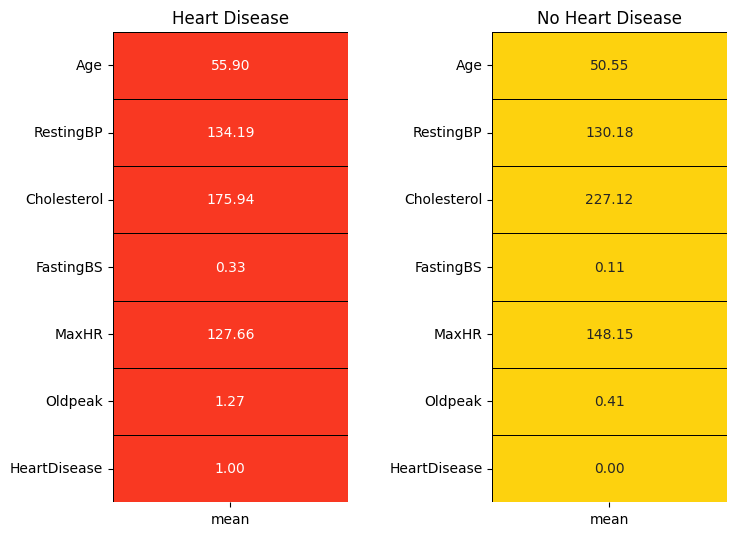

In [ ]:
# Mean values for patients with and without heart disease
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate statistics for patients with and without heart disease
yes_stats = df[df['HeartDisease'] == 1].describe().T
no_stats = df[df['HeartDisease'] == 0].describe().T


colors = ['#F93822','#FDD20EFF']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

# Heatmap for patients with heart disease
sns.heatmap(yes_stats[['mean']], annot=True, cmap=[colors[0]], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('Heart Disease')

# Heatmap for patients without heart disease
sns.heatmap(no_stats[['mean']], annot=True, cmap=[colors[1]], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('No Heart Disease')


fig.tight_layout(pad=3)


plt.show()


In [ ]:
for col in df.columns:
    n = df[col].nunique()
    print(col + " has %s unique values" %n)

Age has 50 unique values
Sex has 2 unique values
ChestPainType has 4 unique values
RestingBP has 67 unique values
Cholesterol has 222 unique values
FastingBS has 2 unique values
RestingECG has 3 unique values
MaxHR has 119 unique values
ExerciseAngina has 2 unique values
Oldpeak has 53 unique values
ST_Slope has 3 unique values
HeartDisease has 2 unique values


In [ ]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

It seems ChestPainType has 4 unique values and need to be encoded in ordinal format.

<Figure size 1200x600 with 0 Axes>

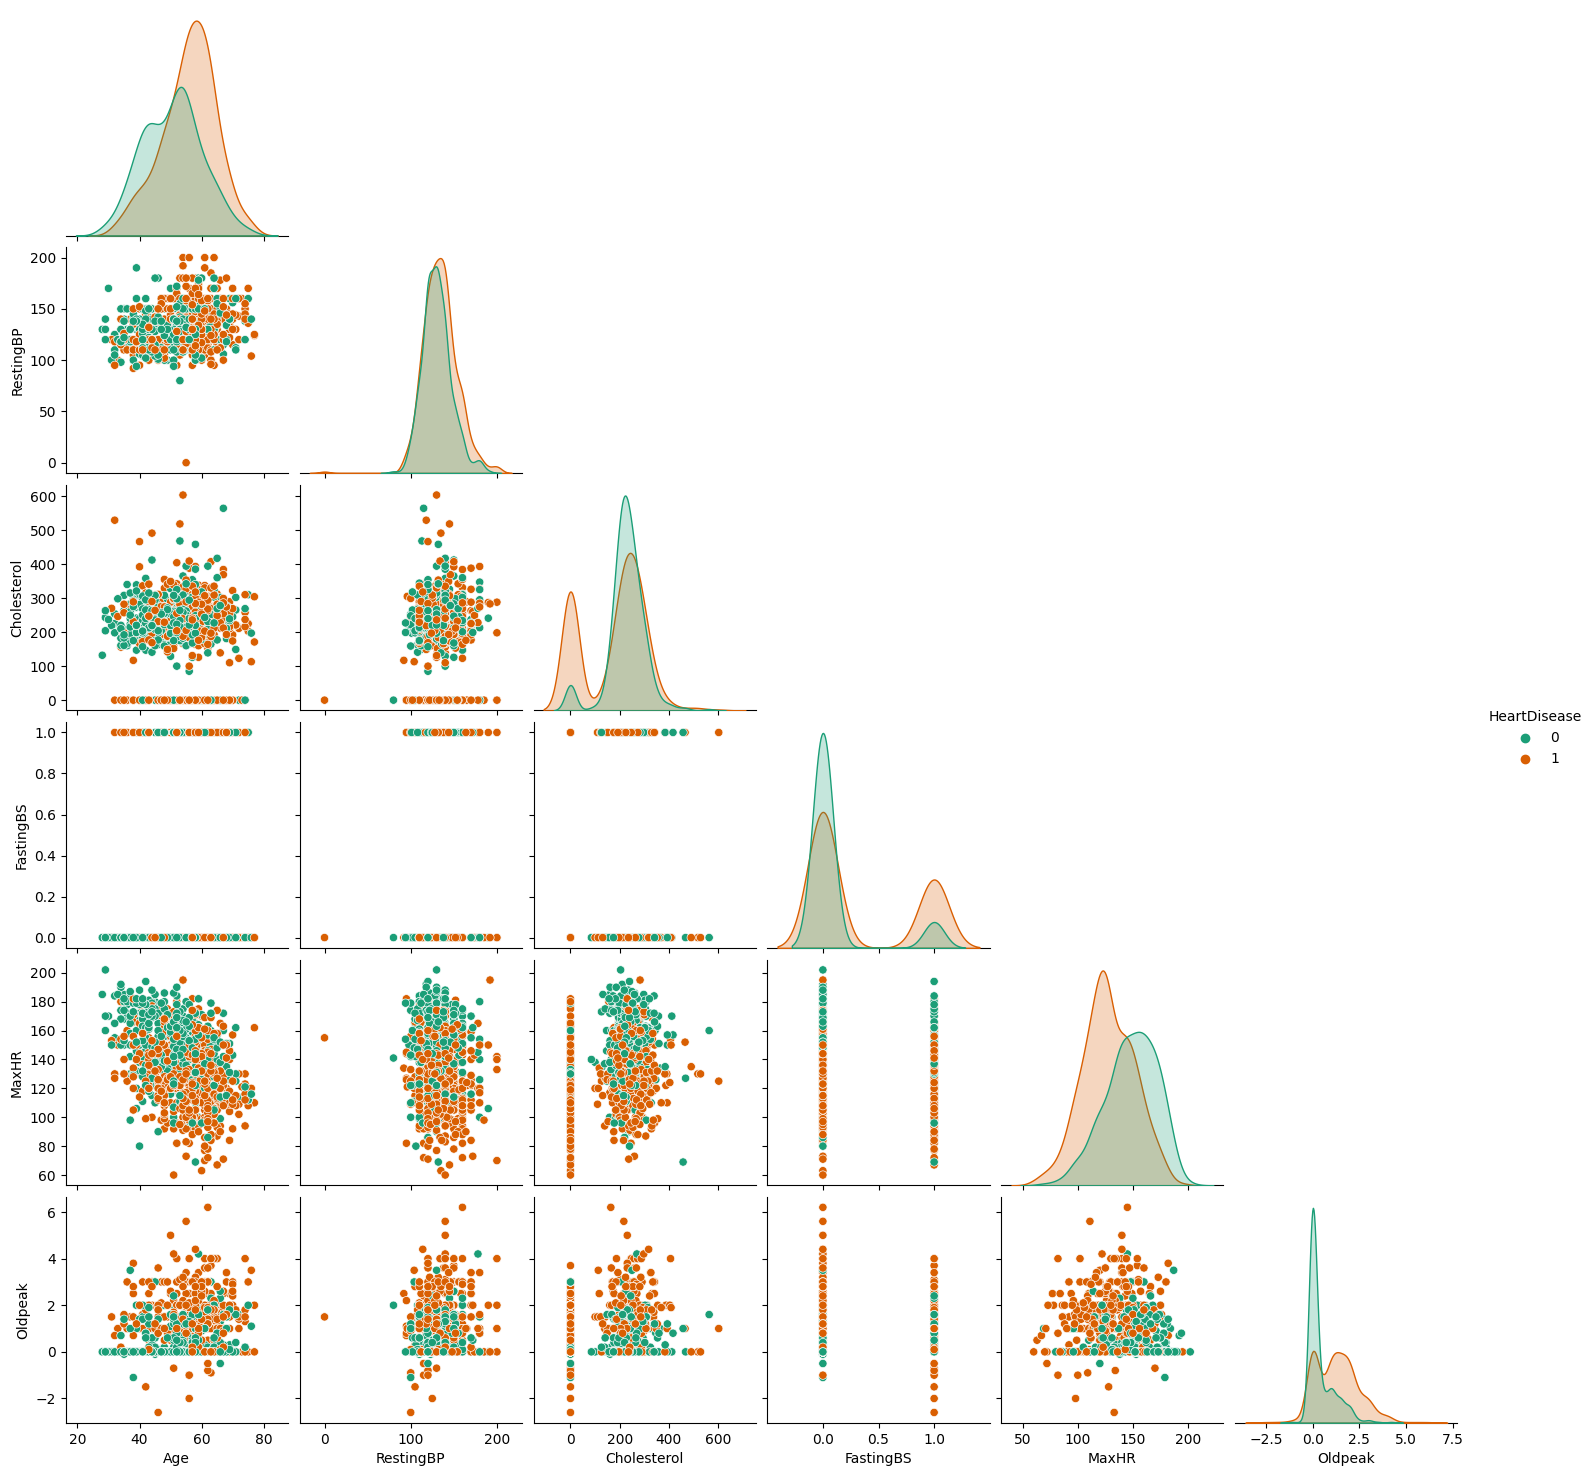

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='HeartDisease',palette='Dark2',  corner=True);

In [ ]:
from scipy.stats import skew

for column in df.columns:
    # Sadece sayısal sütunlardaki skewness'ı kontrol et
    if pd.api.types.is_numeric_dtype(df[column]):
        skewness = skew(df[column])
        print(f"Skewness for {column}: {skewness}")
    else:
        print(f"{column} is not numeric and has been skipped.")

Skewness for Age: -0.19561273124487544
Sex is not numeric and has been skipped.
ChestPainType is not numeric and has been skipped.
Skewness for RestingBP: 0.17954532149156327
Skewness for Cholesterol: -0.6090891046626045
Skewness for FastingBS: 1.2624170859488144
RestingECG is not numeric and has been skipped.
Skewness for MaxHR: -0.14412342991429325
ExerciseAngina is not numeric and has been skipped.
Skewness for Oldpeak: 1.0211999031135828
ST_Slope is not numeric and has been skipped.
Skewness for HeartDisease: -0.21473473034684154


It seems numerical features have normal distribution.

In [ ]:
# Categorical and Numerical Features. Attention FastingBS is a binary feature
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)




Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


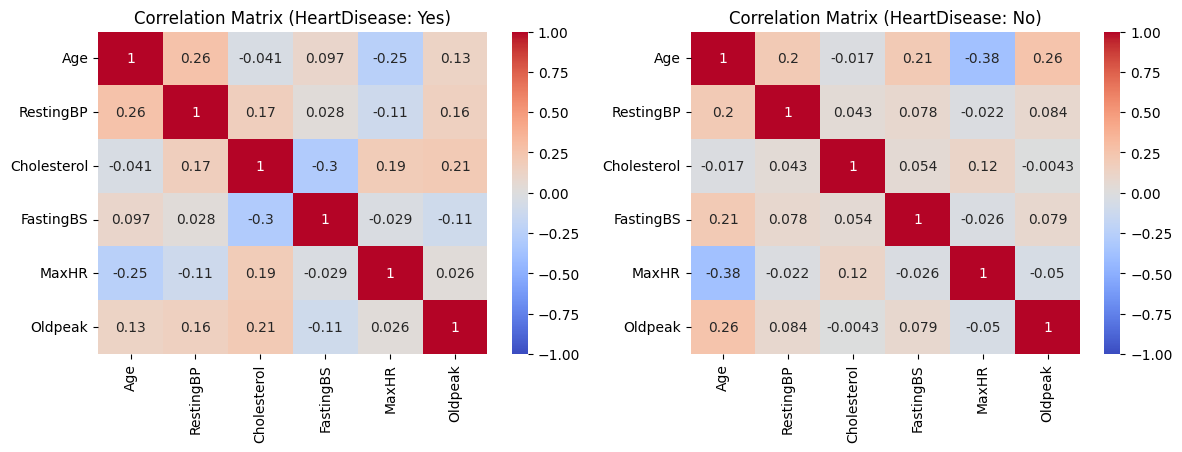

In [ ]:
# Filtering for 'HeartDisease: Yes'
heart_disease_yes_df = df[df['HeartDisease'] == 1]

# Filtering for 'HeartDisease: No'
heart_disease_no_df = df[df['HeartDisease'] == 0]

# Selecting numerical features for correlation analysis
features_to_analyze = ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR', 'Oldpeak']

# Calculating correlations
correlation_hd_yes = heart_disease_yes_df[features_to_analyze].corr()
correlation_hd_no = heart_disease_no_df[features_to_analyze].corr()

# Visualizing correlation matrices
plt.figure(figsize=(12, 8))

# Subplot for 'HeartDisease: Yes'
plt.subplot(2, 2, 1)
sns.heatmap(correlation_hd_yes, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix (HeartDisease: Yes)')

# Subplot for 'HeartDisease: No'
plt.subplot(2, 2, 2)
sns.heatmap(correlation_hd_no, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix (HeartDisease: No)')

plt.tight_layout()
plt.show()


### Categorical Features vs Target Variable (HeartDisease)

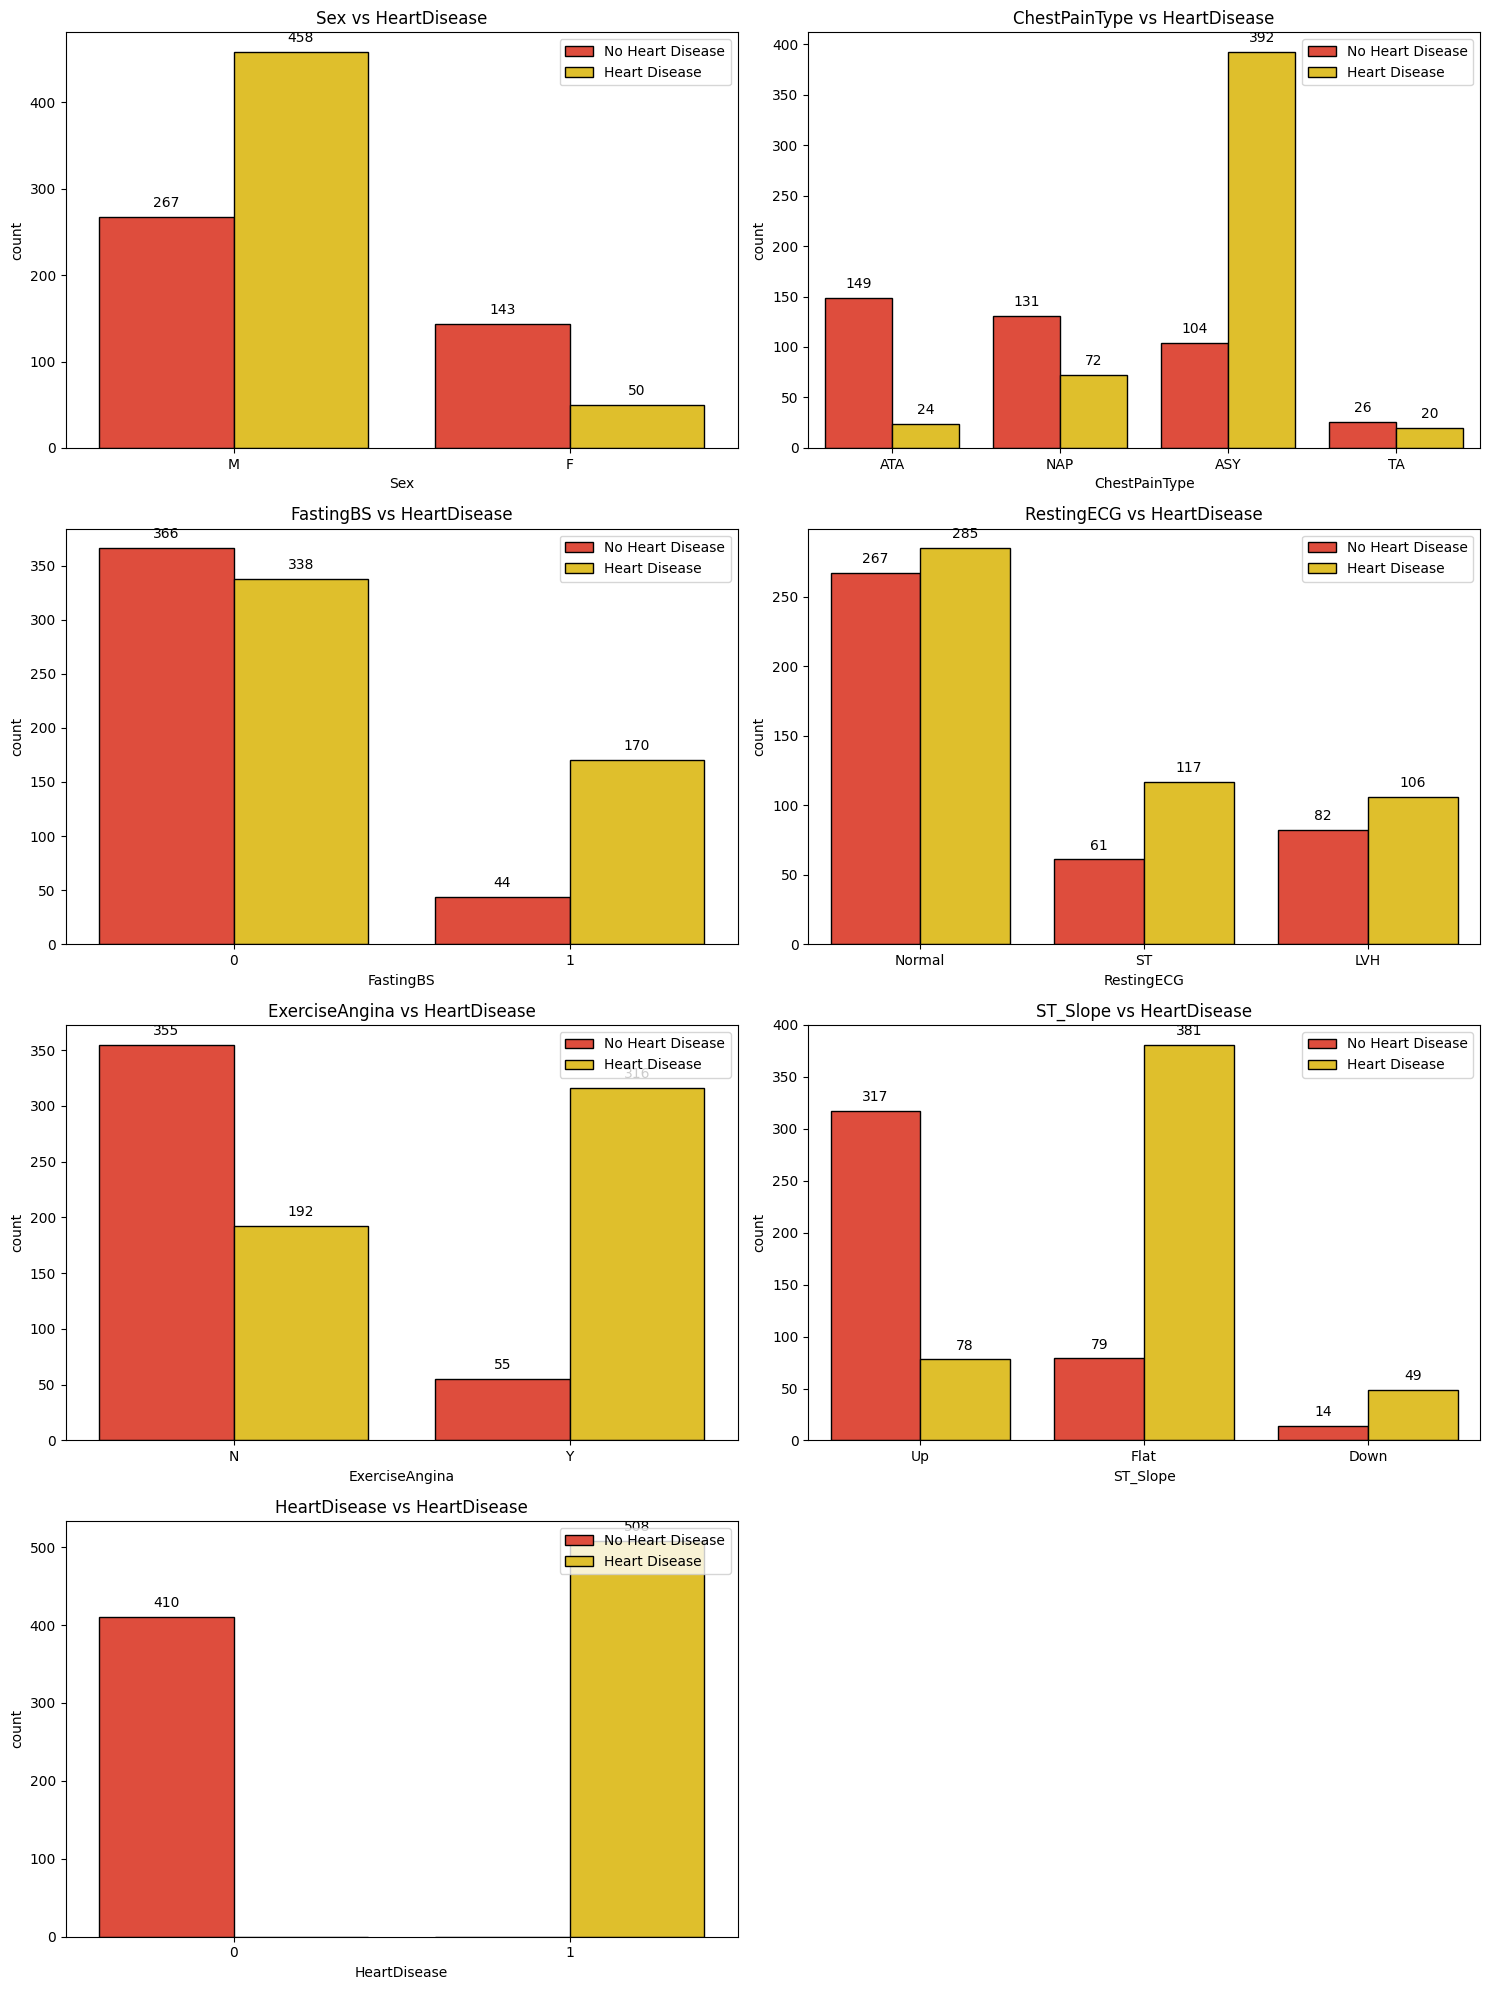

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'categorical_features' is a list of your categorical column names
# Define the color palette for the plots
colors = ['#F93822','#FDD20EFF']

# Calculate the required number of rows to display all categorical features (2 columns per row)
num_features = len(categorical_features)
num_rows = num_features // 2 if num_features % 2 == 0 else (num_features // 2) + 1

# Create a figure and a grid of subplots with specified size
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration if there is more than one row
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # If only one row, put the single axes object into a list for consistency

# Loop through each categorical feature to create a catplot for each
for i, feature in enumerate(categorical_features):
    # Create the countplot with the current categorical feature
    sns.countplot(x=feature, data=df, hue="HeartDisease", palette=colors, edgecolor='black', ax=axes[i])

    # Add labels on top of each bar with the count
    for rect in axes[i].patches:
        if rect.get_height() > 0:  # Only annotate bars with height greater than 0
            axes[i].annotate(f'{int(rect.get_height())}',
                             (rect.get_x() + rect.get_width() / 2., rect.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10), textcoords='offset points')

    # Set the title for the current subplot
    axes[i].set_title(f'{feature} vs HeartDisease')
    axes[i].legend(['No Heart Disease', 'Heart Disease'], loc='upper right')

# If the number of categorical features is odd, remove the last (empty) subplot
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()  # Adjust the layout to prevent overlapping of subplots
plt.show()  # Display the plots


The male demographic exhibits a higher incidence of heart disease compared to those without. Conversely, within the female demographic, the prevalence of heart disease is lower than that of non-heart disease cases.

The ASY (asymptomatic) chest pain type is a strong indicator of a significant risk for heart disease.

Fasting Blood Sugar (FBS) presents an interesting observation. Both patients with and without elevated fasting blood sugar levels show a considerable number of heart disease cases.

The RestingECG readings do not distinctly categorize patients with heart disease. All three categories (Normal, LVH, ST) include a high count of heart disease cases.

The presence of Exercise-Induced Angina (EIA) markedly increases the likelihood of a heart disease diagnosis.

Regarding ST_Slope values, a flat slope is associated with a very high probability of heart disease diagnosis. A downsloping ST also indicates heart disease but is represented by fewer data points.

In [ ]:
# Features and target
# one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [ ]:
df_encoded.shape

(918, 16)

In [ ]:
# Splitting the data into features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:


# Creating and training the model
model_lr = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluating the model
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Confusion Matrix:
 [[68  9]
 [18 89]]
Accuracy: 0.8532608695652174


## Using GridSearchCV for Hyperparameter Tuning:

In [ ]:
# Hyperparameter Optimization
param_grid = {'C': np.logspace(-4, 4, 20),
              'solver': ['liblinear']}
grid_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_model.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']})

In [ ]:
# Retraining the model with the best parameters
best_params = grid_model.best_params_
model = LogisticRegression(**best_params)
model.fit(X_train_scaled, y_train)


LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [ ]:
grid_model.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [ ]:
# Evaluating the optimized model
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Confusion Matrix:
 [[68  9]
 [18 89]]
Accuracy: 0.8532608695652174


# Another hyperparameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the operations for the pipeline
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

# Create a pipeline with the defined operations
log_pipe = Pipeline(steps=operations)

# Define the hyperparameter grid for the Logistic Regression model
C = [0.01, 0.05, 0.08, 0.09, 0.1, 1]
class_weight = ["balanced", None]

param_grid = [
    {
        "logistic__penalty": ['l2', 'none'],
        "logistic__C": C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['sag', 'lbfgs']
    },
    {
        "logistic__penalty": ['l1', 'l2'],
        "logistic__C": C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['liblinear', 'saga']
    }
]

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10)

# Create the GridSearchCV object
grid_model_log = GridSearchCV(estimator=log_pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring="recall",
                               n_jobs=-1,
                               return_train_score=True)



In [ ]:
grid_model_log.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.01, 0.05, 0.08, 0.09, 0.1, 1],
                          'logistic__class_weight': ['balanced', None],
                          'logistic__penalty': ['l2', 'none'],
                          'logistic__solver': ['sag', 'lbfgs']},
                         {'logistic__C': [0.01, 0.05, 0.08, 0.09, 0.1, 1],
                          'logistic__class_weight': ['balanced', None],
                          'logistic__penalty': ['l1', 'l2'],
                          'logistic__solver': ['liblinear', 'saga']}],
             return_train_score=True, scoring='recall')

In [ ]:
grid_model_log.best_params_

{'logistic__C': 0.01,
 'logistic__class_weight': None,
 'logistic__penalty': 'l2',
 'logistic__solver': 'sag'}

In [ ]:
pd.DataFrame(grid_model_log.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.867805
mean_train_score    0.877251
Name: 1, dtype: object

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(grid_model_log, X_train, y_train, X_test, y_test)

Test_Set
[[68  9]
 [19 88]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Train_Set
[[275  58]
 [ 34 367]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       333
           1       0.86      0.92      0.89       401

    accuracy                           0.87       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.88      0.87      0.87       734



ROC (Receiver Operating Curve) and AUC (Area Under Curve)

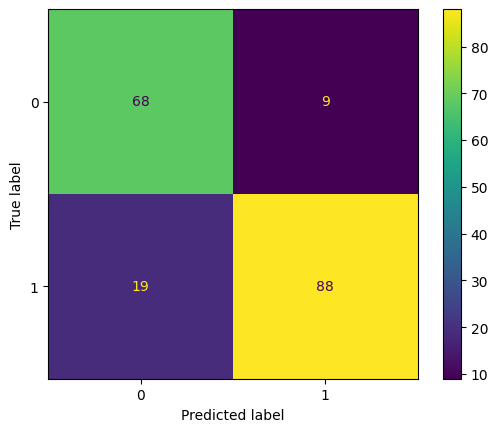

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_model_log, X_test, y_test)

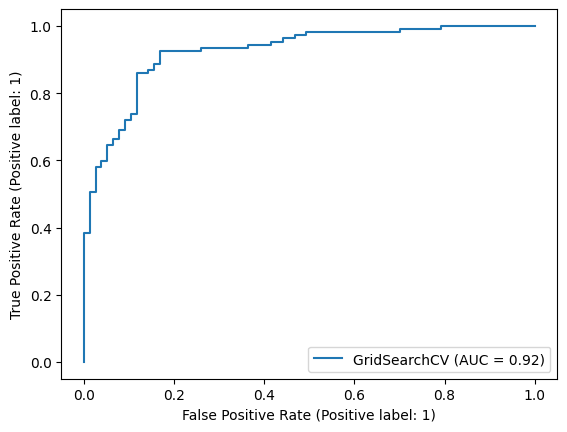

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid_model_log, X_test, y_test)

# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(grid_model, X_test, y_test);

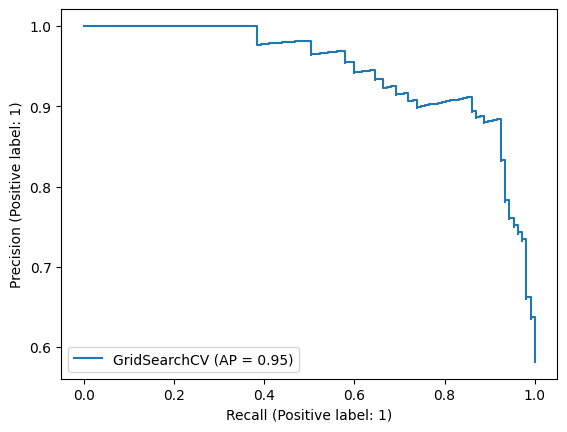

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(grid_model_log, X_test, y_test)

Note that I used ordinal encoding for ChestPain. The model peformance not better than logistic regression.

## Feature Selection

#### Chi Squared Test :

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
df1=df.copy()

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Örnek DataFrame'inizi oluşturun (data adınızı kullandım)
df1 = df.copy(deep=True)

# Belirli sütunlara label encoding uygulayın
label_encoder = LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])



In [ ]:
categorical_features

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

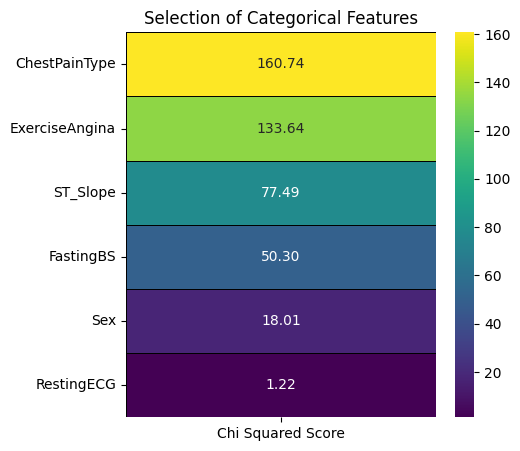

In [ ]:
features = df1.loc[:, categorical_features[:-1]]
target = df1.loc[:, categorical_features[-1]]

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])


plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'),
            annot=True, cmap='viridis', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()


Except RestingECG, I will keep the remaining categorical features and use them in the model.

## Oneway ANOVA:

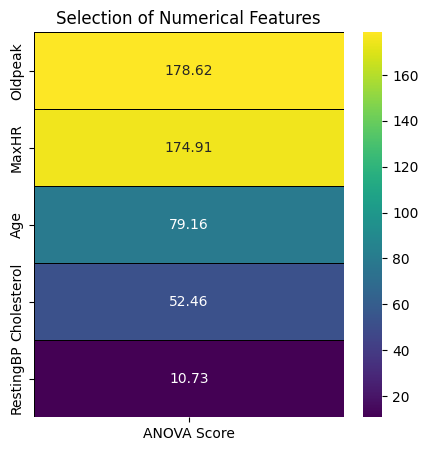

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt

features = df1.loc[:, numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap='viridis', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()


We will exclude RestingBP from the modeling  and use the remaining features.

In [ ]:
ft = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])]
target = df1['HeartDisease'].values
X_train, X_test, y_train, y_test = train_test_split(ft, target, test_size = 0.20, random_state = 42)

In [ ]:
# Creating and training the model
model_lr_feat = LogisticRegression()
model_lr_feat.fit(X_train, y_train)




LogisticRegression()

In [ ]:
# Evaluating the model
eval_metric(model_lr_feat, X_train, y_train, X_test, y_test)

Test_Set
[[68  9]
 [20 87]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184


Train_Set
[[274  59]
 [ 46 355]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       333
           1       0.86      0.89      0.87       401

    accuracy                           0.86       734
   macro avg       0.86      0.85      0.86       734
weighted avg       0.86      0.86      0.86       734



## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
def model_score(classifier):

    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, X_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_eval(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'viridis' ,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))

In [ ]:
model_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  84.24%
Cross Validation Score :  91.33%
ROC_AUC Score :  84.81%


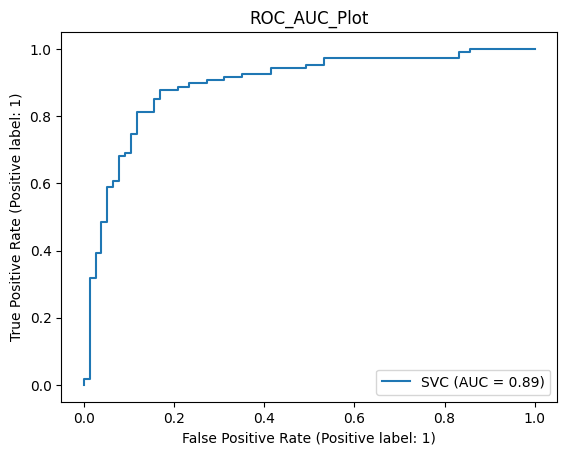

In [ ]:
model_score(model_svc)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



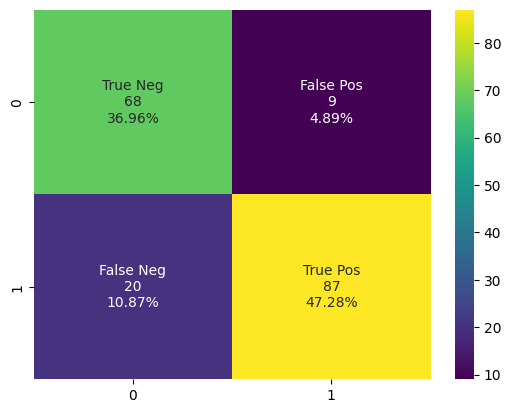

In [ ]:
model_eval(model_svc)

Random Forest Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(max_depth = 4,random_state = 42)

Accuracy :  87.50%
Cross Validation Score :  92.71%
ROC_AUC Score :  87.61%


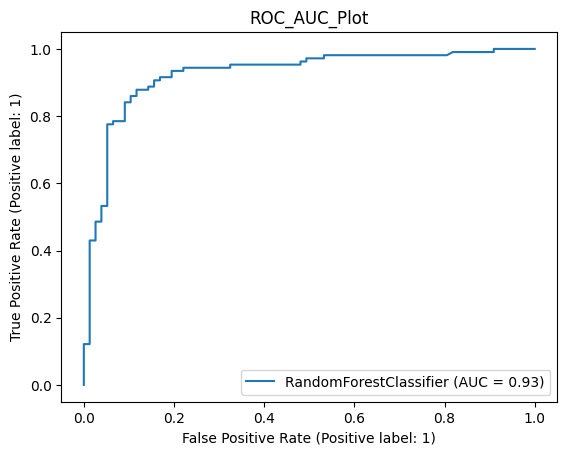

In [ ]:
model_score(model_rf)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



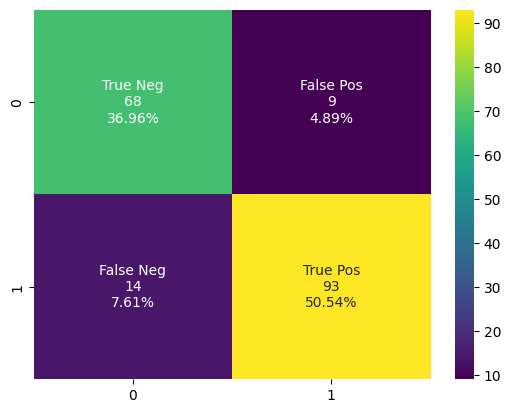

In [ ]:
model_eval(model_rf)

## K-nearest Neighbors Classifier :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  73.37%
Cross Validation Score :  76.68%
ROC_AUC Score :  73.28%


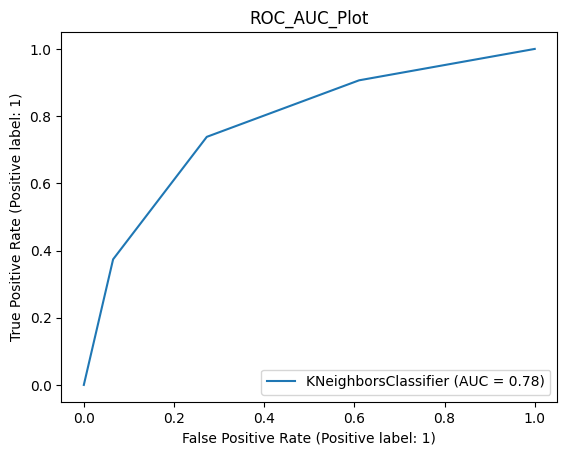

In [ ]:
model_score(model_knn)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        77
           1       0.79      0.74      0.76       107

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.74      0.73      0.73       184



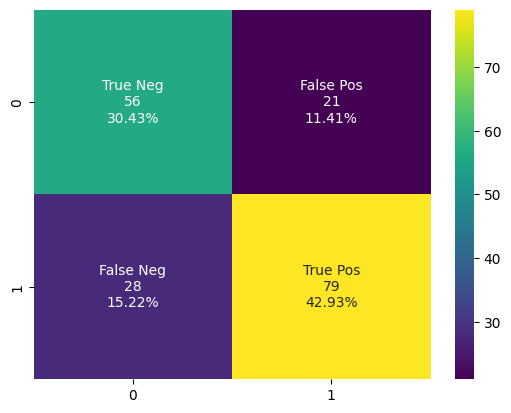

In [ ]:
model_eval(model_knn)

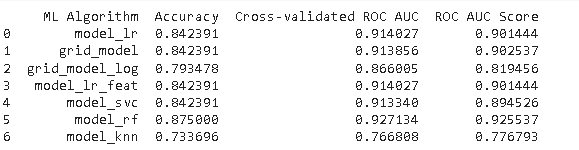



This dataset serves as an excellent resource for comprehending the intricacies of handling binary classification issues that involve both numerical and categorical features. Medical professionals, such as doctors or nurses, can benefit from the insights provided, aiding them in making informed decisions.

When it comes to feature engineering, the sequence of processes might seem perplexing. In this case, data scaling was performed before conducting the feature selection test. Despite concerns about potentially altering the data before subjecting it to tests, the results remain consistent regardless of the order of these processes.


Visualization plays a crucial role. It breathes life into the data, making it more expressive. Presenting information and test results through visualization is essential, as it enhances understanding.

Regarding modeling, hyperparameter tuning has not been implemented. While it has the potential to improve algorithm performance, the overall performance of the algorithms is already satisfactory.